### Obesity Level Prediction using Logistic Regression
This notebook applies logisitc regression to predict obesity levels based on lifestyle and demographic variables. 

Current working directory: /Users/ashleyrazo/mlfinalproject/ml-project-obesity-prediction
X_train columns:
 ['age', 'height_m', 'weight_kg', 'gender_Male', 'family_history_overweight_yes', 'high_caloric_food_freq_yes', 'vegetables_freq_Never', 'vegetables_freq_Sometimes', 'main_meal_count_More than three', 'main_meal_count_Three', 'snacking_freq_Frequently', 'snacking_freq_Sometimes', 'snacking_freq_no', 'smokes_yes', 'water_intake_Less than a liter', 'water_intake_More than 2 L', 'calorie_tracking_yes', 'physical_activity_freq_2 or 4 days', 'physical_activity_freq_4 or 5 days', 'physical_activity_freq_I do not have', 'screen_time_hours_3-5 hours', 'screen_time_hours_More than 5 hours', 'alcohol_consumption_freq_Frequently', 'alcohol_consumption_freq_Sometimes', 'alcohol_consumption_freq_no', 'transport_mode_Bike', 'transport_mode_Motorbike', 'transport_mode_Public_Transportation', 'transport_mode_Walking']
Pipeline steps: {'classifier': LogisticRegression(max_iter=1000, random_state=4

/opt/miniconda3/envs/ml2025/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/ml2025/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/ml2025/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/ml2025/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/ml2025/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/ml2025/lib/python3.

Best parameters: {'classifier__C': 10, 'classifier__penalty': 'l2'}
Best cross-validation accuracy: 0.9099

Test Set Performance:
Accuracy: 0.9220

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.98      0.93        56
      Normal_Weight       0.91      0.81      0.85        62
     Obesity_Type_I       0.96      0.94      0.95        78
    Obesity_Type_II       0.95      0.97      0.96        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.84      0.86      0.85        56
Overweight_Level_II       0.88      0.90      0.89        50

           accuracy                           0.92       423
          macro avg       0.92      0.92      0.92       423
       weighted avg       0.92      0.92      0.92       423



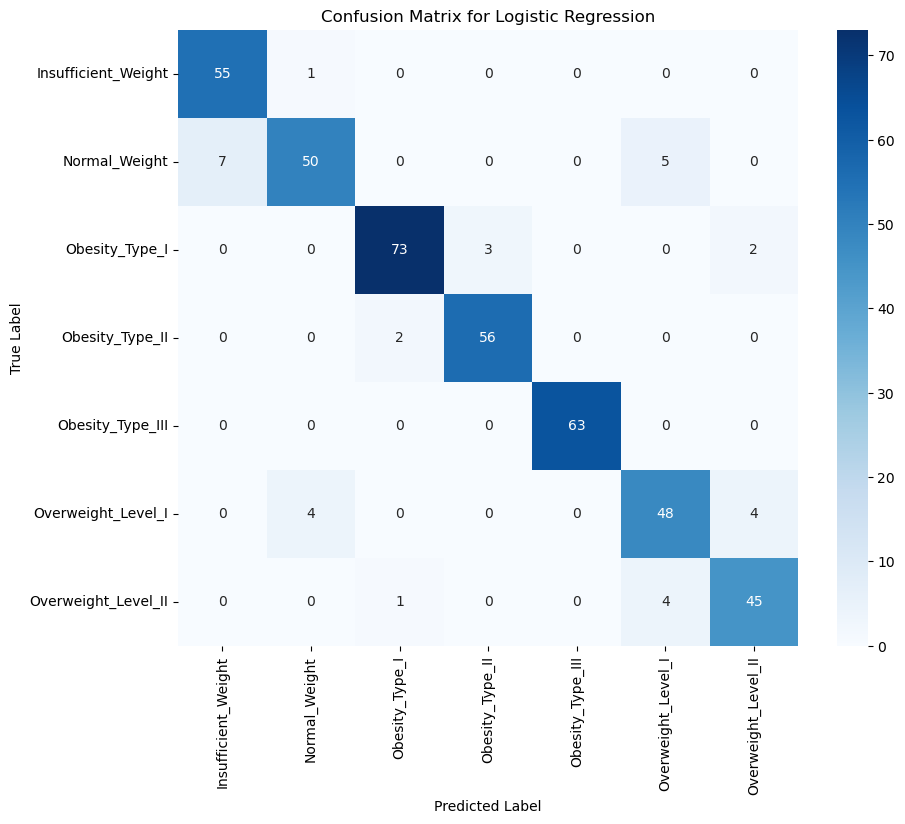

In [26]:
# Import libraries
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)




print("Current working directory:", os.getcwd())
# Load split data from feather files
#train_path = os.path.join("..", "processed_data", "train_data.feather")
#test_path = os.path.join("..", "processed_data", "test_data.feather")
train_path = os.path.join("processed_data", "train_data.feather")
test_path = os.path.join("processed_data", "test_data.feather")                         


train_df = pd.read_feather(train_path)
test_df = pd.read_feather(test_path)

# Split features and labels
y_train = train_df["obesity_level"]
X_train = train_df.drop(columns=["obesity_level"])

y_test = test_df["obesity_level"]
X_test = test_df.drop(columns=["obesity_level"])

#actual column names 
print("X_train columns:\n", X_train.columns.tolist())

# Encode the target variable (necessary for classification)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create pipeline
pipeline_lr = Pipeline([
    ('classifier', LogisticRegression(max_iter=1000, solver='saga', random_state=42))
])

# Define parameter grid for Logistic Regression
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],  # Regularization strength (inverse)
    'classifier__penalty': ['l2']          # L2 regularization
}


print("Pipeline steps:", pipeline_lr.named_steps)

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline_lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train_encoded)

# Get the best model
best_lr = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Evaluate on test set
y_pred = best_lr.predict(X_test)
test_accuracy = accuracy_score(y_test_encoded, y_pred)
print("\nTest Set Performance:")
print(f"Accuracy: {test_accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


### Confusion Matrix Explanation 
The confusion  matrix shows how well a model's predictions match the actual labels. Some insights from the confusion matrix are:

- Misclassifications are more frequent in the "Normal_Weight" and "Overweight_Level_I/II" classes. The model struggles more with these compared to the obesity types, likely due to <strong>class overlap</strong> or underrepresentation in the data. This may guide sampling adjustments or weighted loss functions. 

- "Insufficient_Weight" has <strong>precision (0.89)</strong> and very high <strong>recall(0.98)</strong> meaning the model rarely misclassifies others as this class and identifies it well. 

- "Overweight_Level_I" and "Overweight_Level_II" both have <strong>lower recall(0.86 and 0.90 respectively)</strong> and <strong>F-1 scores(~0.85 - 0.89)</strong> highlighting weakness in distinguishing between these classes. This may show <strong>which predictions you can trust more than others</strong> which can be critical in medical contexts. 

- Additionally, the confusion between "Normal_Weight" and "Overweight_Level_I" suggests features (e.g. calorie tracking or exercise) are not distinctive enough between these classes. 

#### Summary 
- Best logisitc regression parameters: $C = 10$, Penalty = $L2$
- Cross-validation Accuracy: $90.99%$
- Test Set Accuracy: $92.20%$
- Logistic regression performs well across most classes with minor misclassification in closely related categories (e.g. Overweight I vs II).